# Kaggle Midterm 
## - Prediction of Baseball Player Salary from Lahman Baseball Databank
#### - By Tricia

## 1. Import libraries and load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read data
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")
print(train.shape)
print(test.shape)
train.head()

(6284, 32)
(1109, 31)


,id,playerID,yearID,stint,teamID,lgID,W,L,G,GS,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary_next_year
0,0,nelsoge01,1986,1,CHA,AL,6,6,54,1,...,3.0,3.0,0.0,488.0,26.0,52,NaN,NaN,NaN,365000.0
1,1,moyerja01,1997,1,SEA,AL,17,5,30,30,...,3.0,7.0,0.0,787.0,0.0,82,NaN,NaN,NaN,2000000.0
2,2,thompbr01,2008,1,SLN,NL,6,3,26,6,...,2.0,3.0,0.0,273.0,10.0,38,NaN,NaN,NaN,650000.0
3,3,powerte01,1986,1,CIN,NL,10,6,56,10,...,5.0,1.0,1.0,537.0,30.0,59,NaN,NaN,NaN,500000.0
4,4,osunaan01,2003,1,NYA,AL,2,5,48,0,...,3.0,2.0,0.0,232.0,16.0,22,NaN,NaN,NaN,750000.0


### Check salary stat and distribution

count    6.284000e+03
mean     2.153669e+06
std      2.990285e+06
min      6.000000e+04
25%      3.500000e+05
50%      8.750000e+05
75%      2.788542e+06
max      2.428571e+07
Name: salary_next_year, dtype: float64


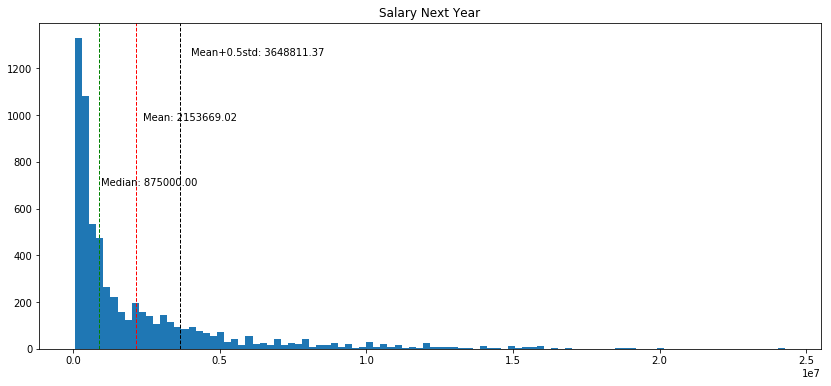

In [3]:
 print(train.salary_next_year.describe())
#plot salary
plt.figure(figsize=(14, 6))
plt.hist(train.salary_next_year, bins=100)
plt.title("Salary Next Year")
#add lines
#mean, median
mean=train.salary_next_year.mean()
median=train.salary_next_year.median()
std=train.salary_next_year.std()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean+0.5*std, color='black', linestyle='dashed', linewidth=1)
#label
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.7, 'Mean: {:.2f}'.format(mean))
plt.text(median*1.1, max_ylim*0.5, 'Median: {:.2f}'.format(median))
plt.text((mean+0.5*std)*1.1, max_ylim*0.9, 'Mean+0.5std: {:.2f}'.format(mean+0.5*std))
plt.show()


In [4]:
#only one record
only_one=train.playerID.value_counts()[train.playerID.value_counts()==1].keys()
only_one

Index(['halldr01', 'rosebr01', 'nitkocj01', 'brandma01', 'evelada01',
       'lorraan01', 'arredjo01', 'brazoyh01', 'rzepcma01', 'niesejo01',
       'youngcl01', 'erickjo01', 'dresery01', 'nolteer01', 'nieveju01',
       'boggsmi01', 'wainhda01', 'conveji01', 'hunteto02', 'nippeal01',
       'powelro01', 'medlekr01', 'ottoda01', 'hansegr01', 'baileco01',
       'roberwi01', 'menhapa01', 'eshelva01', 'borkoda01', 'bannibr01',
       'kellesh01', 'chambjo03', 'chacigu01', 'fikacje01', 'cornena01',
       'mutisje01', 'mercahe01', 'prinzbr01', 'fistedo01', 'rowlary01',
       'arochre01', 'cangejo01', 'robergr01', 'johnsda04', 'chrismi02',
       'mortoch02', 'jamesch03', 'caudibi01', 'campbmi01', 'stoddti01',
       'santijo03', 'ainswku01', 'montgst01', 'rogeres01', 'benneje01',
       'howelke01', 'wrighwe01', 'perryry01', 'parnebo01', 'bronkje01',
       'ishiika01', 'kerfech01', 'dunnemi01', 'runyase01', 'easteja01',
       'hudsolu01', 'holtobr01', 'happja01', 'germafr01'],
      dt

In [5]:
#combine data
dat_all=pd.concat((train, test))
dat_all.keys()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Index(['BAOpp', 'BB', 'BFP', 'BK', 'CG', 'ER', 'ERA', 'G', 'GF', 'GIDP', 'GS',
       'H', 'HBP', 'HR', 'IBB', 'IPouts', 'L', 'R', 'SF', 'SH', 'SHO', 'SO',
       'SV', 'W', 'WP', 'id', 'lgID', 'playerID', 'salary_next_year', 'stint',
       'teamID', 'yearID'],
      dtype='object')

#### Dataset information
##### 欄位意義:
- playerID:球員編號
- yearID:年份
- stint:球員在一季中出場的順序 
- teamID:隊伍編號 
- lgID:美聯(AL)或國聯(NL) 
- salary_next_year:明年合約的薪水
- W:勝場次
- L:敗場次
- G:出場次數
- GS:球員是先發投手的次數
- CG:投手獨力投完全場的比賽次數
- SHO:投完整場比賽，且沒有失去任何分數的次數
- SV:救援成功次數(投手沒有搞砸球隊優勢)
- IPouts:投球局數*3
- H:被安打數
- ER:自責分
- HR:被全壘打數
- BB:四壞保送次數
- SO:三振次數
- BAOpp:對手平均打擊率
- ERA:防禦率
- IBB:四壞球次數
- WB:暴投次數
- HBP:觸身球次數
- BK:投手犯規次數
- BFP:單一投手面臨多少打者
- GF:完成比賽之次數(記於最後一任投手上)
- R:打擊分數總計
- SH:犧牲觸擊次數
- SF:飛犧牲打次數
- GIDP:雙殺打次數

In [6]:
### add salary from previous and next year
dat_all=dat_all.sort_values(by=['playerID','yearID']).copy()

dat_all['sal_prev']=dat_all.groupby('playerID')['salary_next_year'].shift(1)
dat_all['sal_prev2']=dat_all.groupby('playerID')['salary_next_year'].shift(2)

dat_all['sal_after']=dat_all.groupby('playerID')['salary_next_year'].shift(-1)
dat_all['sal_after2']=dat_all.groupby('playerID')['salary_next_year'].shift(-2)



#dat_all[['playerID','yearID', 'sal_prev2','sal_prev', 'salary_next_year', 'sal_after', 'sal_after2']].head()
dat_all

,BAOpp,BB,BFP,BK,CG,ER,ERA,G,GF,GIDP,...,lgID,playerID,salary_next_year,stint,teamID,yearID,sal_prev,sal_prev2,sal_after,sal_after2
966,0.41,10,61.0,0.0,0,8,6.75,11,5.0,NaN,...,NL,aardsda01,387500.0,1,SFN,2004,NaN,NaN,NaN,419000.0
335,NaN,17,151.0,0.0,0,23,6.40,25,7.0,NaN,...,AL,aardsda01,NaN,1,CHA,2007,387500.0,NaN,419000.0,2750000.0
2542,NaN,35,228.0,0.0,0,30,5.55,47,7.0,NaN,...,AL,aardsda01,419000.0,1,BOS,2008,NaN,387500.0,2750000.0,500000.0
4047,NaN,34,296.0,0.0,0,20,2.52,73,53.0,NaN,...,AL,aardsda01,2750000.0,1,SEA,2009,419000.0,NaN,500000.0,NaN
1364,NaN,25,202.0,0.0,0,19,3.44,53,43.0,NaN,...,AL,aardsda01,500000.0,1,SEA,2010,2750000.0,419000.0,NaN,NaN
623,0.23,28,337.0,0.0,0,27,2.98,66,58.0,NaN,...,AL,aasedo01,625000.0,1,BAL,1986,NaN,NaN,675000.0,NaN
1393,0.27,4,33.0,0.0,0,2,2.25,7,6.0,NaN,...,AL,aasedo01,675000.0,1,BAL,1987,625000.0,NaN,NaN,NaN
711,0.24,37,209.0,0.0,0,21,4.05,35,16.0,NaN,...,AL,aasedo01,NaN,1,BAL,1988,675000.0,625000.0,NaN,NaN
2324,0.27,74,788.0,2.0,4,79,3.92,29,0.0,NaN,...,AL,abbotji01,185000.0,1,CAL,1989,NaN,NaN,NaN,1850000.0
317,0.29,72,925.0,3.0,4,106,4.51,33,0.0,NaN,...,AL,abbotji01,NaN,1,CAL,1990,185000.0,NaN,1850000.0,2350000.0


## 2. EDA

### 2-1 Check missing values

In [7]:
dat_all.isna().sum()

BAOpp               2887
BB                     0
BFP                    0
BK                     1
CG                     0
ER                     0
ERA                    0
G                      0
GF                     0
GIDP                7393
GS                     0
H                      0
HBP                    1
HR                     0
IBB                    1
IPouts                 0
L                      0
R                      0
SF                  7393
SH                  7393
SHO                    0
SO                     0
SV                     0
W                      0
WP                     1
id                     0
lgID                   0
playerID               0
salary_next_year    1109
stint                  0
teamID                 0
yearID                 0
sal_prev            2165
sal_prev2           3230
sal_after           2181
sal_after2          3224
dtype: int64

### 2-2 Remove **SH**, **SF** and **GIDF** which contain all nan values.


In [8]:
#check data type
dat_all.dtypes

BAOpp               float64
BB                    int64
BFP                 float64
BK                  float64
CG                    int64
ER                    int64
ERA                 float64
G                     int64
GF                  float64
GIDP                float64
GS                    int64
H                     int64
HBP                 float64
HR                    int64
IBB                 float64
IPouts                int64
L                     int64
R                     int64
SF                  float64
SH                  float64
SHO                   int64
SO                    int64
SV                    int64
W                     int64
WP                  float64
id                    int64
lgID                 object
playerID             object
salary_next_year    float64
stint                 int64
teamID               object
yearID                int64
sal_prev            float64
sal_prev2           float64
sal_after           float64
sal_after2          

In [9]:
dat_all.drop(columns=["SH", "SF","GIDP"], inplace=True)


### 2-3 Check record per player

In [10]:
colnames=dat_all.keys()
print(colnames)
print(type(colnames))



Index(['BAOpp', 'BB', 'BFP', 'BK', 'CG', 'ER', 'ERA', 'G', 'GF', 'GS', 'H',
       'HBP', 'HR', 'IBB', 'IPouts', 'L', 'R', 'SHO', 'SO', 'SV', 'W', 'WP',
       'id', 'lgID', 'playerID', 'salary_next_year', 'stint', 'teamID',
       'yearID', 'sal_prev', 'sal_prev2', 'sal_after', 'sal_after2'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


### 2-4 Plot numeric columns

In [11]:
#check ID counts
lst_id=lst=[k for k in colnames if "ID" in k]
print(lst_id)


['lgID', 'playerID', 'teamID', 'yearID']


In [12]:
#record per playerID
player_ct=pd.DataFrame(dat_all[lst_id[1]].value_counts())
player_ct.index.name = 'ID'
player_ct.reset_index(inplace=True)
player_ct.rename(columns={'ID':'playerID', 'playerID':'record_counts'}, inplace=True)
#player_ct
dat_all[lst_id[1]].value_counts().value_counts()



2     216
3     213
4     153
5     135
7      92
6      90
9      76
8      72
10     50
11     36
13     31
12     28
14     16
16     13
15      9
17      9
19      5
20      3
18      2
21      1
24      1
Name: playerID, dtype: int64

['BAOpp', 'BB', 'BFP', 'BK', 'CG', 'ER', 'ERA', 'G', 'GF', 'GS', 'H', 'HBP', 'HR', 'IBB', 'IPouts', 'L', 'R', 'SHO', 'SO', 'SV', 'W', 'WP', 'salary_next_year', 'stint', 'sal_prev', 'sal_prev2', 'sal_after', 'sal_after2']


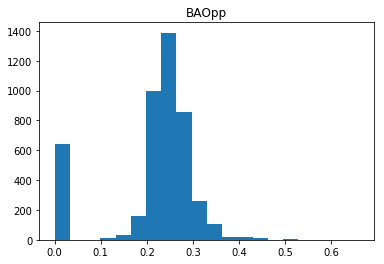

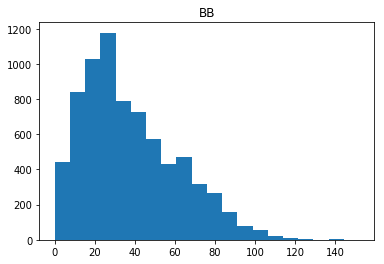

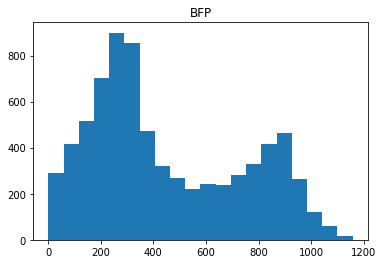

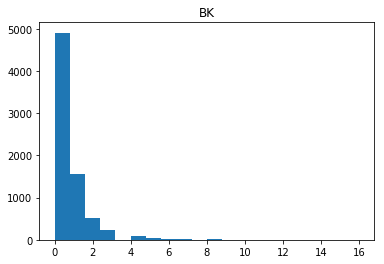

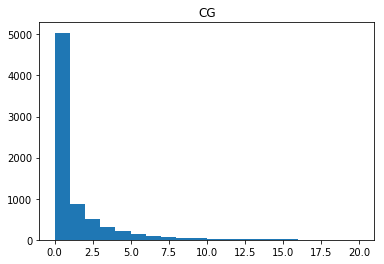

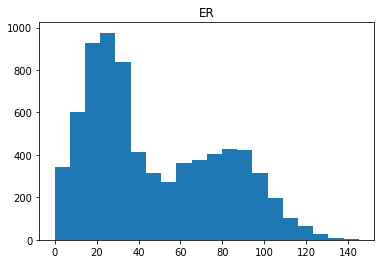

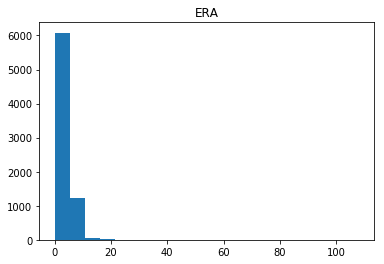

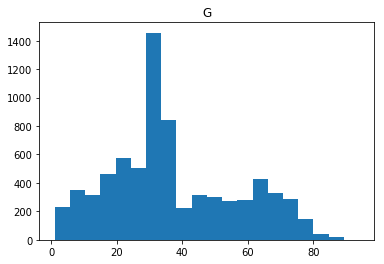

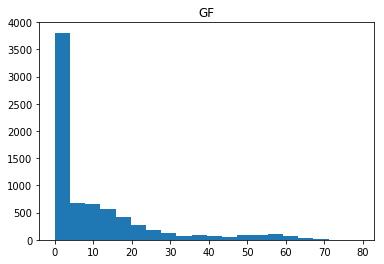

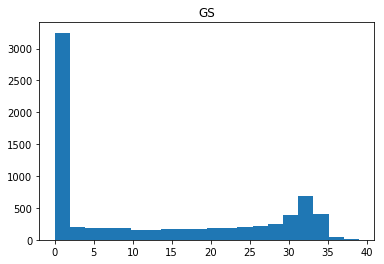

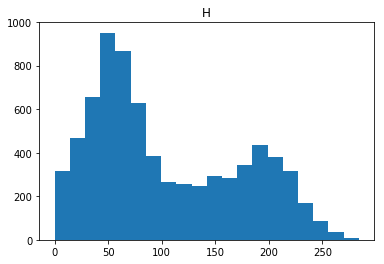

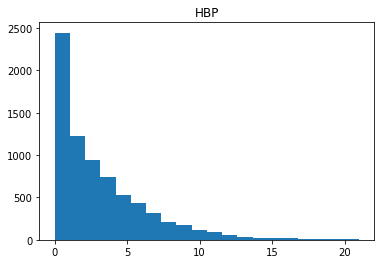

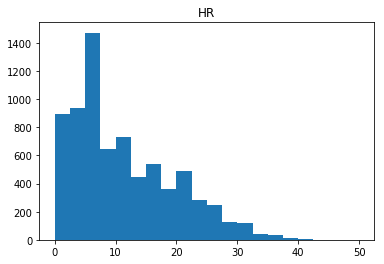

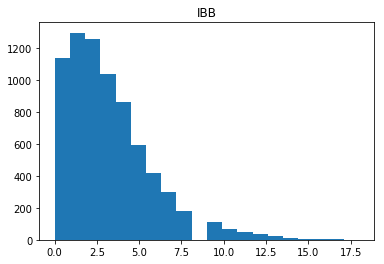

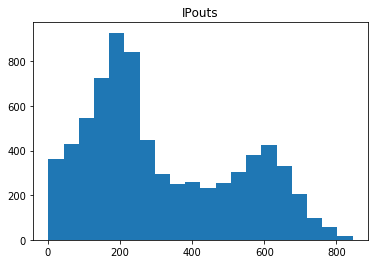

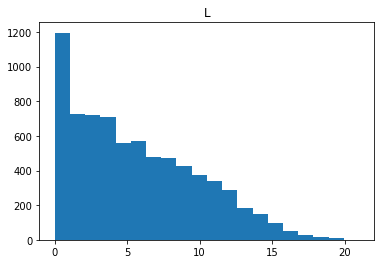

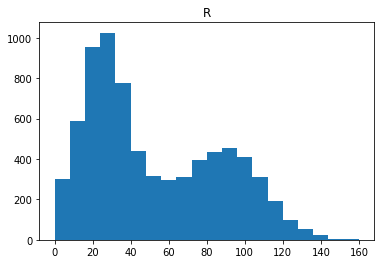

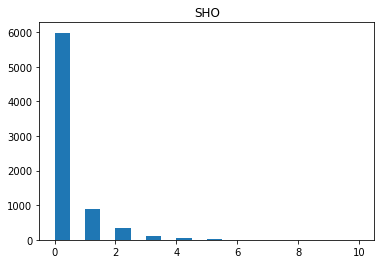

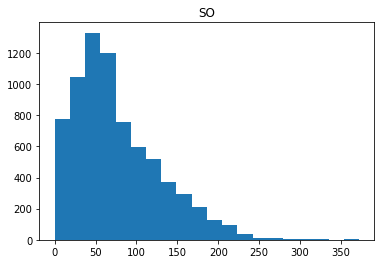

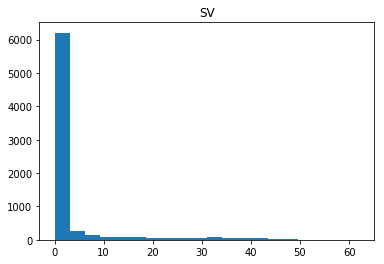

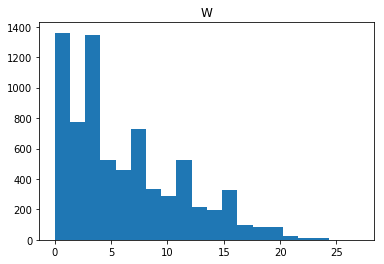

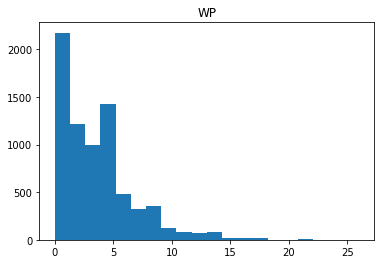

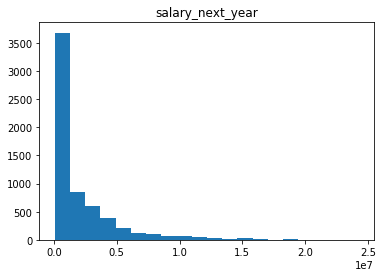

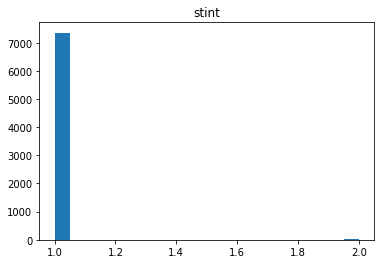

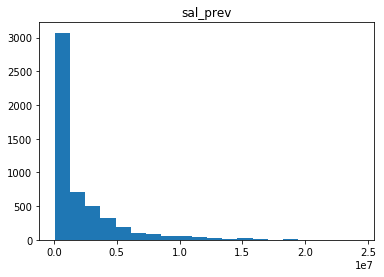

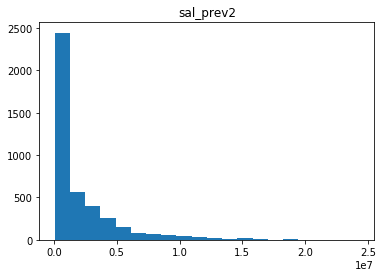

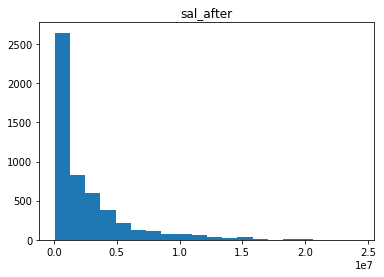

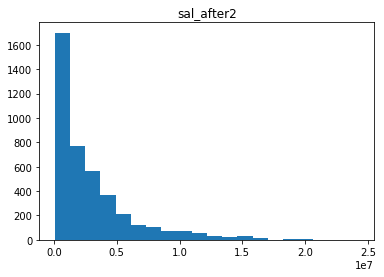

In [13]:
##remove ID columns before plotting
lst=[k for k in colnames if "ID" not in k]
lst=[k for k in lst if "id" not in k]
print(lst)

for i in lst :
    dat=dat_all[i].dropna()
    plt.hist(dat, bins=20)
    plt.title(i)
    plt.show()
    

## 3. Feature Engineering

In [14]:
#### Combine train and test data for feature engineering
x_all=dat_all.drop(columns=("salary_next_year")).copy()
y_all=dat_all.salary_next_year.copy()

#transform y to log(y) 
#y_all=np.log1p(y_all)

### 3-1 Label top and bottom players

In [15]:
#Select playerID with top12 salaries
top_players=dat_all.nlargest(12, 'salary_next_year').playerID.unique()

#select playerID with bottom 500 salaries
bottom_players=dat_all.nsmallest(500, 'salary_next_year').playerID.unique()   #way more bottom players than top ones
bottom_players

#label top and bottom players
x_all['top_players']=np.where(x_all['playerID'].isin(top_players),1,0)
x_all['bottom_players']=np.where(x_all['playerID'].isin(bottom_players),1,0)

print('Labeled Top', len(top_players), 'th Players')
print('and', len(bottom_players), 'th Players afterwards')

Labeled Top 8 th Players
and 338 th Players afterwards


#### plot salary trends

<Figure size 960x480 with 0 Axes>

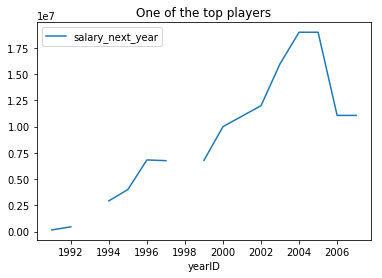

<Figure size 960x480 with 0 Axes>

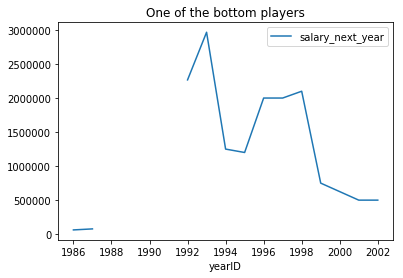

In [16]:
#top players
subset = dat_all.loc[dat_all['playerID']==top_players[4],:].sort_values(by=['yearID'])
plt.figure(figsize=(12, 6), dpi=80)
subset.groupby('playerID').plot(x='yearID', y='salary_next_year', legend=True)
plt.title('One of the top players')
plt.show()

#top players
subset = dat_all.loc[dat_all['playerID']==bottom_players[4],:].sort_values(by=['yearID'])
plt.figure(figsize=(12, 6), dpi=80)
subset.groupby('playerID').plot(x='yearID', y='salary_next_year', legend=True)
plt.title('One of the bottom players')
plt.show()



### 3-2 Add **Total years** and types of contract terms

In [17]:
##total years
x_all['total_years']=x_all.groupby('playerID')['yearID'].transform('nunique')

#terms (short, medium, long)
def func(df):
    if df['total_years'] <= 4 :
        return 'short'
    if 5< df['total_years'] <= 10:
        return 'medium'
    else:
        return 'long'

x_all['terms'] = x_all.apply(func, axis='columns')


### 3-3 Add other new features

In [18]:
# Turn BAOpp into binary variable
x_all['BAOpp_type']=np.where(x_all['BAOpp']>0, 1, 0)

#Winnine percentage(WPCT)
x_all['WPCT']=x_all.W/(x_all.W+x_all.L)
x_all.WPCT.fillna(0, inplace=True)
## WPCT previous year
x_all['WPCT_prev']=x_all.groupby('playerID',)['WPCT'].shift(1)
x_all['WPCT_prev2']=x_all.groupby('playerID',)['WPCT'].shift(2)
x_all['WPCT_prev3']=x_all.groupby('playerID',)['WPCT'].shift(3)
x_all['WPCT_after']=x_all.groupby('playerID',)['WPCT'].shift(-1)
x_all['WPCT_after2']=x_all.groupby('playerID',)['WPCT'].shift(-2)

##Home runs
x_all['HR_prev']=x_all.groupby('playerID',)['HR'].shift(1)
x_all['HR_prev2']=x_all.groupby('playerID',)['HR'].shift(2)
x_all['HR_prev3']=x_all.groupby('playerID',)['HR'].shift(3)
x_all['HR_after']=x_all.groupby('playerID',)['HR'].shift(-1)
x_all['HR_after2']=x_all.groupby('playerID',)['HR'].shift(-2)

#WHIP是Walks Plus Hits per Inning Pitched的縮寫，意思是「投手每投一局會讓多少人上壘」，算法是保送(BB)+安打(H)/局數(IP)
x_all['WHIP']=(x_all.BB+x_all.H)/x_all.IPouts/3
x_all['WHIP_prev']=x_all.groupby('playerID',)['WHIP'].shift(1)
x_all['WHIP_prev2']=x_all.groupby('playerID',)['WHIP'].shift(2)
x_all['WHIP_prev3']=x_all.groupby('playerID',)['WHIP'].shift(3)
x_all['WHIP_after']=x_all.groupby('playerID',)['WHIP'].shift(-1)
x_all['WHIP_after2']=x_all.groupby('playerID',)['WHIP'].shift(-2)

##all walks 
x_all['walks_G']=(x_all.BB+x_all.IBB)/x_all.G

## rookie_year in league
x_all['nth_year']=x_all.groupby('playerID')['yearID'].rank("dense", ascending=False) #nth year
x_all['rookie']=np.where(x_all['nth_year']==1, 1, 0)

##saves, shoutouts and wins by IP
x_all['positive_ind']=(x_all.SV+x_all.SO+x_all.W)/x_all.IPouts/3


#x_all

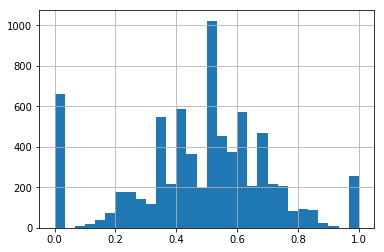

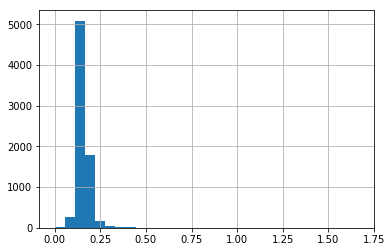

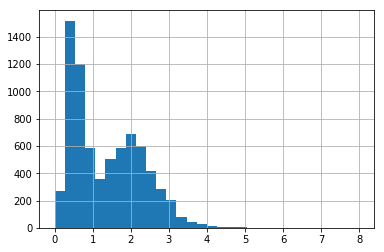

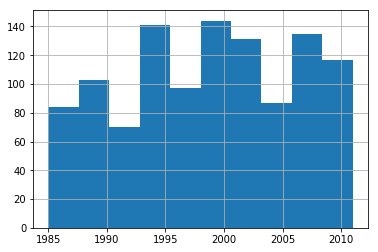

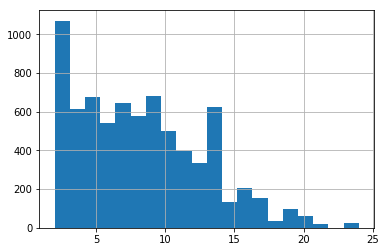

In [19]:
#Plot new features
x_all.WPCT.hist(bins=30)
plt.show()
x_all.WHIP.hist(bins=30)
plt.show()
#x_all.walks.hist(bins=30)
#plt.show()
x_all.walks_G.hist(bins=30)
plt.show()
test.yearID.hist()
plt.show()
x_all.total_years.hist(bins=20)


### 3-4 Label encoding

In [20]:
#label encoding
from sklearn import preprocessing  #import class preprocessing from sklearn
LE=preprocessing.LabelEncoder()
# label encoding for all object columns
for col in x_all.select_dtypes("object").columns :
    LE=preprocessing.LabelEncoder()
    x_all[col]=LE.fit_transform(x_all[col])

x_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7393 entries, 966 to 5511
Data columns (total 58 columns):
BAOpp             4506 non-null float64
BB                7393 non-null int64
BFP               7393 non-null float64
BK                7392 non-null float64
CG                7393 non-null int64
ER                7393 non-null int64
ERA               7393 non-null float64
G                 7393 non-null int64
GF                7393 non-null float64
GS                7393 non-null int64
H                 7393 non-null int64
HBP               7392 non-null float64
HR                7393 non-null int64
IBB               7392 non-null float64
IPouts            7393 non-null int64
L                 7393 non-null int64
R                 7393 non-null int64
SHO               7393 non-null int64
SO                7393 non-null int64
SV                7393 non-null int64
W                 7393 non-null int64
WP                7392 non-null float64
id                7393 non-null int64
l

#### One hot encoding (最後沒用)

In [21]:
def one_hot_encoding(dat, columns_one_hot):
    return pd.get_dummies(dat, columns=columns_one_hot)

columns_one_hot=['yearID']
x_all_one_hot=one_hot_encoding(x_all, columns_one_hot)
#x_all_one_hot.info()

## 4. Modeling

### 4-1 Prepare data list 

In [22]:
dat=x_all
#dat=x_all_one_hot
test_processed = dat[y_all.isna()]   #testing data 沒有y
train_processed = dat[~y_all.isna()] # not= '~' 

In [23]:
print(test_processed.shape)
print(train_processed.shape)

(1109, 58)
(6284, 58)


In [24]:
from sklearn.model_selection import train_test_split
drop_cols=["id", "W", 'L',"BAOpp",'BFP','BK','BB', 'H', 'HBP', 'R', 'stint', 'positive_ind', 'nth_year'] #columns to remove
#drop_cols=["id"] 
train_cols = train_processed.drop(columns=drop_cols).columns   
print(train_cols)
x_train, x_test, y_train, y_test = train_test_split(train_processed[train_cols], 
                                                    y_all[~y_all.isna()], 
                                                    test_size=0.3, random_state=100)
#x_train.sort_values(by=['playerID','yearID'])

Index(['CG', 'ER', 'ERA', 'G', 'GF', 'GS', 'HR', 'IBB', 'IPouts', 'SHO', 'SO',
       'SV', 'WP', 'lgID', 'playerID', 'teamID', 'yearID', 'sal_prev',
       'sal_prev2', 'sal_after', 'sal_after2', 'top_players', 'bottom_players',
       'total_years', 'terms', 'BAOpp_type', 'WPCT', 'WPCT_prev', 'WPCT_prev2',
       'WPCT_prev3', 'WPCT_after', 'WPCT_after2', 'HR_prev', 'HR_prev2',
       'HR_prev3', 'HR_after', 'HR_after2', 'WHIP', 'WHIP_prev', 'WHIP_prev2',
       'WHIP_prev3', 'WHIP_after', 'WHIP_after2', 'walks_G', 'rookie'],
      dtype='object')


### 4-2 Modeling

#### LGBM Regressor

In [25]:
import lightgbm as lgb
model=lgb.LGBMRegressor(learning_rate=0.05
                        , n_estimators=200, random_state=3000, reg_lambda=1.8)
model.fit(x_train, y_train, early_stopping_rounds=4, eval_set=[(x_test, y_test)], verbose=False)
y_pred = model.predict(x_test)

### 4-5 Model evaluation

In [26]:
#transform back
#y_test=np.expm1(y_test)
#y_pred=np.expm1(y_pred)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head()

,Actual,Predicted
5247,245000.0,2.612510e+05
5684,3633333.0,3.347426e+06
4338,90000.0,1.433156e+05
2189,475000.0,1.051060e+06
4210,800000.0,7.885729e+05


#### MAE

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 584154.7587730235


#### Kfolds CV (optional)

In [27]:
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score
#kfold = StratifiedKFold(n_splits=40, random_state=7)
#scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
#print("K-fold CV average score: %.2f" % -scores.mean())


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


K-fold CV average score: 619496.39


#### Plot actual vs. predicted values

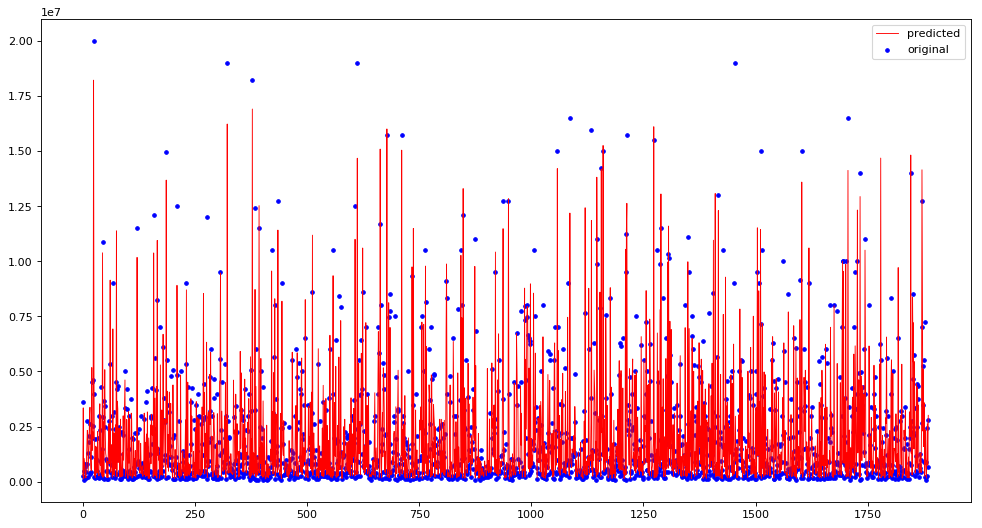

In [28]:
x_ax = range(len(y_test))
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(x_ax, y_test, s=10, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Feature Importance

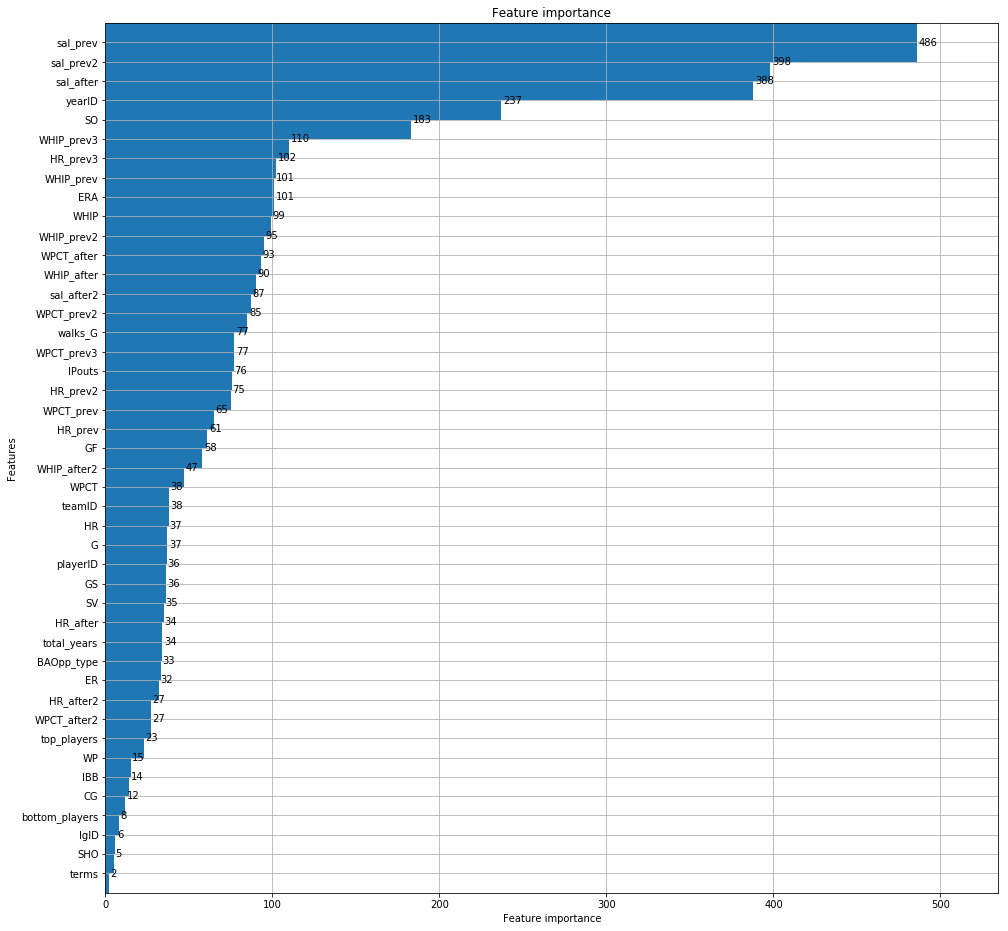

In [29]:
from lightgbm import plot_importance
plot_importance(model, height=2,figsize=(16, 16))

#### Hyperparameter tuning: Randomized Search Cross Validation (didn't work well)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {
 'boosting_type' : ['gbdt', 'goss'],
 'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 3000, num = 50)],
 'learning_rate' : [float(x) for x in np.linspace(start = 0.05042, stop = 0.05049, num = 50)],
 'loss' : ['linear', 'square', 'exponential'],
 'reg_lambda' : [float(x) for x in np.linspace(start = 1.86, stop = 1.89, num = 50)],
 'random_state' : [int(x) for x in np.linspace(start = 50, stop = 3000, num = 30)]
 }

#score = make_scorer(metrics.mean_absolute_error)

randomsearch = RandomizedSearchCV(model, params, cv=20, verbose=1, return_train_score=True)
randomsearch.fit(x_train, y_train, early_stopping_rounds=4, eval_set=[(x_test, y_test)], verbose=False)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


In [ ]:
### fit model with best parameters
best=randomsearch.best_params_
print(best)
model_best=lgb.LGBMRegressor(reg_lambda= best['reg_lambda'], 
                             random_state= best['random_state'], 
                             n_estimators= best['n_estimators'], 
                             loss= best['loss'], 
                             learning_rate= best['learning_rate'], 
                             boosting_type= best['boosting_type'])
#dart doesn't take early_stopping_rounds
if best['boosting_type']=='dart':
    early_stopping_rounds='None'
else:
    early_stopping_rounds=4

#fit model    
model_best.fit(x_train, y_train, 
               early_stopping_rounds=early_stopping_rounds, 
               eval_set=[(x_test, y_test)], 
               verbose=False)
y_pred_best = model_best.predict(x_test)
print('Best Random Searched Score:', randomsearch.best_score_)
print('Mean Absolute Error Best:', metrics.mean_absolute_error(y_test, y_pred_best))

### 5. Submission

In [34]:
dat=test_processed.drop(columns=drop_cols)
#dat.fillna(0, inplace=True)
y_pred=model.predict(dat)
#y_pred=mode_best.predict(dat)  #use model_best after hyperparameter tuning
#y_pred


In [35]:
#把y_pred加回原本的testing data
test_processed['salary_next_year']=y_pred
#test_processed['salary_next_year']=np.expm1(y_pred)   #if log transformed

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
submit=pd.read_csv("data/submission_example.csv")
#submit.head()
submit.shape


(1109, 2)

In [37]:
#merge y_pred back to testing set by ID
submit = submit.drop(columns=['salary_next_year']).merge(test_processed[['id','salary_next_year']]
                                                 ,on='id'
                                                 ,how='left').astype('int')
submit.head()

,id,salary_next_year
0,6284,2385944
1,6285,603448
2,6286,414056
3,6287,3563497
4,6288,13050163


In [1277]:
submit.to_csv('submit_22.csv', index=False)

## Edit notes

- Drop columns with less importance